In [54]:
# Declaring the libraries we need
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image
import cv2

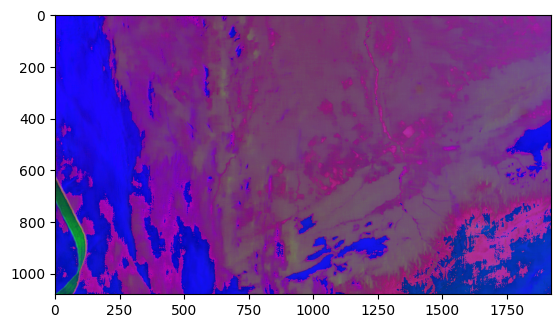

In [55]:
input_image_path = 'selected_images/13-03-40.jpg'
image = cv2.imread(input_image_path) # Loading the image in BGR format
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # Changing it back to HSV
plt.imshow(image)
height, width, cv = image.shape # Getting its dimensions
total = height * width # Calculating the total number of pixels

2060936


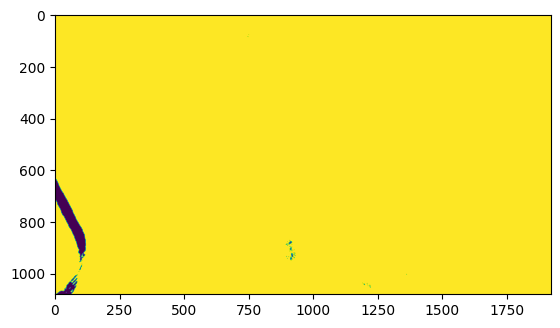

In [56]:
def removeBand(image):
  lower_code = np.array([0, 0, 90])
  upper_code = np.array([255, 255, 255])
  mask = cv2.inRange(image, lower_code, upper_code)
  h, w = mask.shape
  nr = 0
  plt.imshow(mask)
  for i in range(h):
    for j in range(w):
      if(mask[i][j] == 0):
        nr += 1
  return nr

total -= removeBand(image)
print(total)


306423

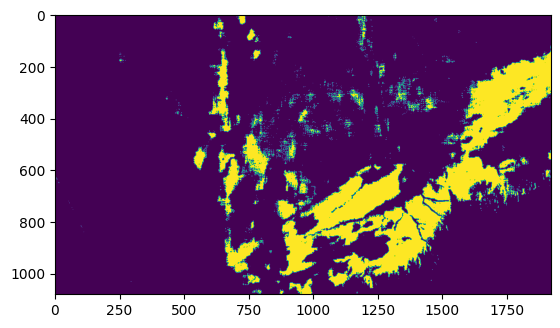

In [57]:
def getWaterPixels(image, showPlot): # Determine the number of blue/water pixels
    lower_blue = np.array([90, 70, 50])
    upper_blue = np.array([130, 255, 255])
    mask = cv2.inRange(image, lower_blue, upper_blue)
    h, w = mask.shape
    nr = 0
    if(showPlot == 1):
      plt.imshow(mask)
    for i in range(h):
      for j in range(w):
        if(mask[i][j] == 255):
          nr += 1

    im = Image.fromarray(mask)
    im.save('water_mask.jpg')
    return nr
getWaterPixels(image, 1)

348969

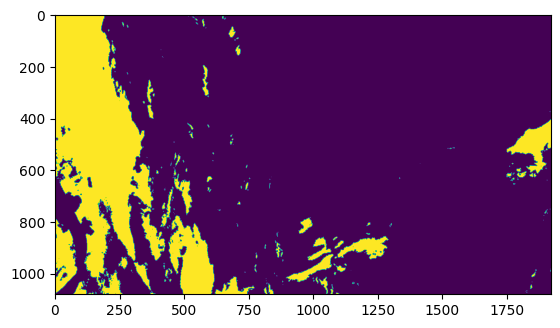

In [58]:
def getCloudPixels(image, showPlot): # Determine the number of white/cloud pixels
    lower_white = np.array([0, 0, 180])
    upper_white = np.array([180, 30, 255])
    mask = cv2.inRange(image, lower_white, upper_white)
    h, w = mask.shape
    nr = 0
    if(showPlot == 1):
      plt.imshow(mask)
    for i in range(h):
      for j in range(w):
        if(mask[i][j] == 255):
          nr += 1
    
    im = Image.fromarray(mask)
    im.save('cloud_mask.jpg')
    return nr
getCloudPixels(image, 1)

In [59]:
# Our CONSTANTS

LAND_ALBEDO = 0.27
WATER_ALBEDO = 0.15
CLOUD_ALBEDO = 0.8
x = 7.654 * (10**(-3))
y = 5.476 * (10**(-3))
f = 6.8445 * (10**(-3))
sigma = 5.6703 * (10**(-8))
FLAT_SURFACE = 0.5063 * (10**(11))
K = 1360.772

In [60]:
waterPixels = getWaterPixels(image, 0)
cloudPixels = getCloudPixels(image, 0)
landPixels = total - waterPixels - cloudPixels
print(total)
totalAlbedo = ((waterPixels * WATER_ALBEDO) + (cloudPixels * CLOUD_ALBEDO) + (landPixels * LAND_ALBEDO)) / total

print(f"The total albedo is: {totalAlbedo}")
elevation = 430 * 1000
surface = (elevation * elevation) * x * y / (f * f)
temperature = ((((1 - totalAlbedo) * FLAT_SURFACE * K) / (sigma * surface))**(1/4))
print(f"The temperature is: {temperature}")

2060936
The total albedo is: 0.3419007334531495
The temperature is: 263.67461904864575
